## 🔰 `Introduction` :

>**Sentiment analysis** refers to `identifying as well as classifying the sentiments` that are expressed in the text source. Tweets are often useful in generating a vast amount of sentiment data upon analysis. These data are useful in understanding the opinion of the people about a variety of topics.

>Therefore we need to develop an **Automated Machine Learning Sentiment Analysis Model** in order to `compute the customer perception`. Due to the presence of non-useful characters (collectively termed as the noise) along with useful data, it becomes difficult to implement models on them.

## 🎯  `Objective` :

>We aim to analyze the sentiment of the tweets provided from the `Sentiment140 dataset` by developing a **`Machine Learning model`** involving the use of three classifiers:
> - **`Logistic Regression - LR`**.
> - **`Bernoulli Naive Bayes - BNB`**.
> - **`Support Vector Machine - SVM`**.  <br>                                                           
Along with using **`Term Frequency- Inverse Document Frequency (TF-IDF)`**.

>The **performance** of these classifiers is then **evaluated** using **accuracy**, **ROC-AUC Curve** and **F1 Scores**.

## 📚 `Project Pipeline` :
>The various steps involved in the Machine Learning Pipeline are :
> - **1️⃣ `Import Necessary Dependencies`**.

> - **2️⃣ `Read and Load the Dataset`**.

> - **3️⃣ `Exploratory Data Analysis`**.

> - **4️⃣ `Data Visualization of Target Variables`**.

> - **5️⃣ `Data Preprocessing`**.

> - **6️⃣ `Splitting our data into Train and Test Subset`**.

> - **7️⃣ `Transforming Dataset using TF-IDF Vectorizer`**.

> - **8️⃣ `Function for Model Evaluation`**.

> - **9️⃣ `Model Building`**.

> - **1️⃣0️⃣ `Conclusion`**.

### 1️⃣ `Importing the necessary dependencies` :

> Here in this part, we import all the necessary libraries that we will use in our project. The choice of libraries depends on the approach we will follow.

In [ ]:
# utilities :
import re # regular expression library
import numpy as np
import pandas as pd

# plotting :
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk :
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')

# sklearn :
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

# time library :
import time

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### 2️⃣ `Reading and Loading the Dataset` :

> In any project related to the manipulation and analysis of data, we always start by collecting the data on which we are going to work. In our case, we will import our data from a `.csv` file.

The various columns present in the dataset are:
- `target`: the polarity of the tweet (positive or negative)
- `ids`: Unique id of the tweet
- `date`: the date of the tweet
- `flag`: It refers to the query. If no such query exists then it is NO QUERY.
- `user`: It refers to the name of the user that tweeted
- `text`: It refers to the text of the tweet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/

 20241126_181753.heic
'cc e book (1).gdoc'
'cc e book (2).gdoc'
'cc e book.gdoc'
 Classroom
'Colab Notebooks'
'Copy of DHEEKSHITHA  K.pdf'
'Curious Freaks Coding Sheet.gsheet'
'datavisualizationassignment(7-8-24).pdf'
'Dheekshitha (1).Koperatingsystemassignment2.pdf'
'Dheekshitha K BSC CS WITH DS(III).pdf'
'Dheekshitha .k Data visualization  practical assignment 1,3,4,0,11.pdf'
'Dheekshitha K_III - Bsc.(CS WITH Data Science)_Shift I.pdf'
'Dheekshitha.Kmobileapplicationdevelopment(15-7-24).pdf'
'Dheekshitha.koperatingsystemassignment(22-7-24).pdf'
 Dheekshitha.Koperatingsystemassignment2.pdf
 Dheekshitha.koperatingsystemassignment-4.pdf
'Document from Dheekshitha Kalidass'
'III BSc CSDS.pdf'
'III DS (1).pdf'
 IMG-20240824-WA0001.jpg
'IOT notes.gdoc'
 JourneytoCloudEnvisioningYourSolution_Badge20240910-7-ch8ubz.pdf
'MINI PROJECT (DHEE)'
'ossystem(iosystem).pdf'
 photo_1.jpg
'Photo from Dheekshitha Kalidas'
'Placement Cheatsheet - Curious Freaks.gdoc'
'Priyadarshini K(python assignment) -

In [ ]:
!ls "/content/drive/MyDrive/MINI PROJECT (DHEE)/"

'MINI_PROJECT(TwitterSentimentAnalysis).ipynb'	 TSA_sourcecode.ipynb
 training.1600000.processed.noemoticon.csv


In [ ]:
file_path = "/content/drive/MyDrive/MINI PROJECT (DHEE)/training.1600000.processed.noemoticon.csv"

In [ ]:
import os
print(os.path.exists(file_path))  # Should return True if the file exists

True


In [ ]:
import pandas as pd
DATASET_COLUMNS = ['target', 'ids', 'date', 'flag', 'user', 'text']
DATASET_ENCODING = "ISO-8859-1"

df = pd.read_csv(file_path, encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
print(df.head())  # Check if data loads correctly

   target         ids                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [ ]:
# Display of the first 5 lines :
df.sample(5)

,target,ids,date,flag,user,text
685447,0,2250778606,Sat Jun 20 01:27:46 PDT 2009,NO_QUERY,ohhaycassiek,i hate when im ignored. so i just left.
1285738,4,2002175593,Tue Jun 02 03:23:49 PDT 2009,NO_QUERY,Mainstreamleics,Mainstream is V excited about Urban Legacy thr...
575585,0,2211116837,Wed Jun 17 12:27:16 PDT 2009,NO_QUERY,kristyrenee78,Wish my ABC network wld get their crap 2gether...
534410,0,2197524833,Tue Jun 16 13:53:55 PDT 2009,NO_QUERY,Bansheelis,You touch my earth you touch my soul
1422307,4,2058465397,Sat Jun 06 14:59:59 PDT 2009,NO_QUERY,m_kellogg,@THE_WOCKEEZ Jabba...you say &quot;THE HUT&quo...


### 3️⃣ `Exploratory Data Analysis` :
> In this part, the objective is to know the imported data as much as possible, we analyze a sample, we look for the shape of the dataset, the column names, the data type information, we check if there are null values, in short, we process our data and above all we target the data (columns) that interests us.

In [ ]:
# Display of the first 5 lines of our dataset :
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
# Display the column names of our dataset :
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [ ]:
# Display the number of records is our dataset :
print('length of data is', len(df))

length of data is 1600000


In [ ]:
df.shape

(1600000, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
df.dtypes

,0
target,int64
ids,int64
date,object
flag,object
user,object
text,object


In [ ]:
# Checking for Null values :
np.sum(df.isnull().any(axis=1))

0

In [ ]:
# Rows and columns in the dataset :
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   1600000


In [ ]:
# Checking unique Target Values :
df['target'].unique()

array([0, 4])

In [ ]:
df['target'].nunique()

2

The **`target`** column is composed of just **0** and **4**
 - **0** stands for `negative` sentiment.
 - **4** stands for `positive` sentiment.

### 4️⃣  `Data Visualization of Target Variables` :
> After processing our data and targeting the columns we are interested in, the next step is to have a visual on our data with mathematical plots, the reason for using plots is that a plots makes the data speak more, so it become more understandable.

In [ ]:
df.groupby('target').count()

,ids,date,flag,user,text
target,,,,,
0,800000,800000,800000,800000,800000
4,800000,800000,800000,800000,800000


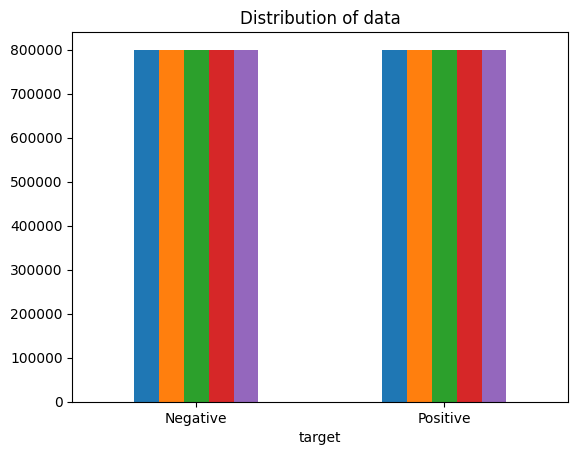

In [ ]:
# Plotting the distribution for dataset :
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
# Naming 0 -> Negative , and 4 -> Positive
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists :
text, sentiment = list(df['text']), list(df['target'])

<ipython-input-25-520112dddc1b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette=['#FF5733', '#33FF57'])  # Red & Green example


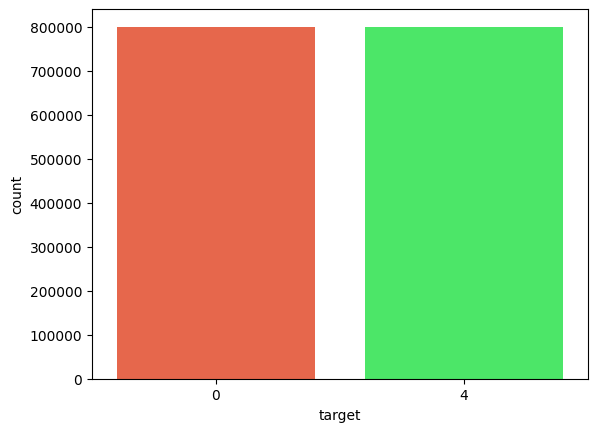

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Custom colors for the two categories
sns.countplot(x='target', data=df, palette=['#FF5733', '#33FF57'])  # Red & Green example

plt.show()

### 5️⃣  `Data Preprocessing ` :
> Before training the model, we will perform various pre-processing steps on the dataset such as:
>- Removing stop words.
>- Removing emojis.
>- Converting the text document to lowercase for better generalization.
>- Cleaning the ponctuation (to reduce unnecessary noise from the dataset).
>- Removing the repeating characters from the words along with removing the URLs as they do not have any significant importance. <br>                          
and much more, we will see this in detail later...

> We will then performe
>- **`Stemming`** : reducing the words to their derived stems.
>- **`Lemmatization`** : reducing the derived words to their root form known as lemma for better results.

In [ ]:
# Selecting the text and Target column for our further analysis :
data = df[['text','target']]

In [ ]:
# Replacing the values to ease understanding :
data['target'] = data['target'].replace(4,1)

<ipython-input-27-e837cacf537b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


In [ ]:
# Print unique values of target variable :
data['target'].unique()

array([0, 1])

In [ ]:
# Separating positive and negative tweets :
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [ ]:
# Combining positive and negative tweets :
dataset = pd.concat([data_pos, data_neg])

In [ ]:
# Quick view of how our data looks:
dataset['text'].tail()

,text
799995,Sick Spending my day laying in bed listening ...
799996,Gmail is down?
799997,rest in peace Farrah! So sad
799998,@Eric_Urbane Sounds like a rival is flagging y...
799999,has to resit exams over summer... wishes he w...


In [ ]:
# Making statement text in lower case :
dataset['text'] = dataset['text'].str.lower()
dataset['text'].tail()

,text
799995,sick spending my day laying in bed listening ...
799996,gmail is down?
799997,rest in peace farrah! so sad
799998,@eric_urbane sounds like a rival is flagging y...
799999,has to resit exams over summer... wishes he w...


In [ ]:
# Defining set containing all stopwords in English :
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
                'and', 'any', 'are', 'as', 'at', 'be', 'because', 'been', 'before',
                'being', 'below', 'between', 'both', 'by', 'can', 'd', 'did', 'do',
                'does', 'doing', 'down', 'during', 'each', 'few', 'for', 'from',
                'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
                'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
                'into', 'is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
                'me', 'more', 'most', 'my', 'myself', 'now', 'o', 'of', 'on', 'once',
                'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'own', 're',
                's', 'same', 'she', "shes", 'should', "shouldve", 'so', 'some', 'such',
                't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
                'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
                'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was',
                'we', 'were', 'what', 'when', 'where', 'which', 'while', 'who', 'whom',
                'why', 'will', 'with', 'won', 'y', 'you', "youd", "youll", "youre",
                "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
# Cleaning and removing the above stop words list from the tweet text :
STOPWORDS = set(stopwordlist)


def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])


dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

,text
800000,love @health4uandpets u guys r best!!
800001,im meeting one besties tonight! cant wait!! - ...
800002,"@darealsunisakim thanks twitter add, sunisa! g..."
800003,sick really cheap hurts much eat real food plu...
800004,@lovesbrooklyn2 effect everyone


In [ ]:
#  Cleaning and removing punctuations :
import string

english_punctuations = string.punctuation
punctuations_list = english_punctuations


def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)


dataset['text'] = dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

,text
799995,sick spending day laying bed listening taylors...
799996,gmail down
799997,rest peace farrah sad
799998,ericurbane sounds like rival flagging ads not ...
799999,resit exams over summer wishes worked harder f...


In [ ]:
# Cleaning and removing repeating characters :
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)


dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

,text
799995,sick spending day laying bed listening taylors...
799996,gmail down
799997,rest peace farrah sad
799998,ericurbane sounds like rival flagging ads not ...
799999,resit exams over summer wishes worked harder f...


In [ ]:
# Cleaning and removing URL’s :
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))', ' ', data)


dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

,text
799995,sick spending day laying bed listening taylors...
799996,gmail down
799997,rest peace farrah sad
799998,ericurbane sounds like rival flagging ads not ...
799999,resit exams over summer wishes worked harder f...


In [ ]:
# Cleaning and removing Numeric numbers :
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

,text
799995,sick spending day laying bed listening taylorswif
799996,gmail down
799997,rest peace farrah sad
799998,ericurbane sounds like rival flagging ads not ...
799999,resit exams over summer wishes worked harder f...


In [ ]:
dataset['text'] = dataset['text'].apply(lambda x: x.split())
dataset['text'].head()

,text
800000,"[love, healthuandpets, u, guys, r, best]"
800001,"[im, meeting, one, besties, tonight, cant, wai..."
800002,"[darealsunisakim, thanks, twitter, add, sunisa..."
800003,"[sick, really, cheap, hurts, much, eat, real, ..."
800004,"[lovesbrooklyn, effect, everyone]"


In [ ]:
# Applying Stemming :
st = nltk.PorterStemmer()

def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

dataset['text'] = dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

,text
800000,"[love, healthuandpets, u, guys, r, best]"
800001,"[im, meeting, one, besties, tonight, cant, wai..."
800002,"[darealsunisakim, thanks, twitter, add, sunisa..."
800003,"[sick, really, cheap, hurts, much, eat, real, ..."
800004,"[lovesbrooklyn, effect, everyone]"


In [ ]:
# Assuming 'df' is the DataFrame containing your data and is already defined
import pandas as pd

# Load the data if 'df' is not defined
try:
    df
except NameError:
    file_path = "/content/drive/MyDrive/MINI PROJECT (DHEE)/training.1600000.processed.noemoticon.csv"
    DATASET_COLUMNS = ['target', 'ids', 'date', 'flag', 'user', 'text']
    DATASET_ENCODING = "ISO-8859-1"
    df = pd.read_csv(file_path, encoding=DATASET_ENCODING, names=DATASET_COLUMNS)

# Selecting the text and Target column for our further analysis:
dataset = df[['text', 'target']]

# ... (Rest of your preprocessing code) ...

# Applying Lemmatizer:
import nltk
from nltk.stem import WordNetLemmatizer

lm = nltk.WordNetLemmatizer()

def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
# Assuming 'df' is the DataFrame containing your data and is already defined
import pandas as pd

# Load the data if 'df' is not defined
try:
    df
except NameError:
    file_path = "/content/drive/MyDrive/MINI PROJECT (DHEE)/training.1600000.processed.noemoticon.csv"
    DATASET_COLUMNS = ['target', 'ids', 'date', 'flag', 'user', 'text']
    DATASET_ENCODING = "ISO-8859-1"
    df = pd.read_csv(file_path, encoding=DATASET_ENCODING, names=DATASET_COLUMNS)

# Selecting the text and Target column for our further analysis:
dataset = df[['text', 'target']]

# ... (Rest of your preprocessing code) ...

# Applying Lemmatizer:
import nltk
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()

def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

<ipython-input-41-9b56fd3fc4a4>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))


,text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,is upset that he can't update his Facebook by ...
2,@Kenichan I dived many times for the ball. Man...
3,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all...."


In [ ]:
# Separating input feature and label :
X = data.text
y = data.target

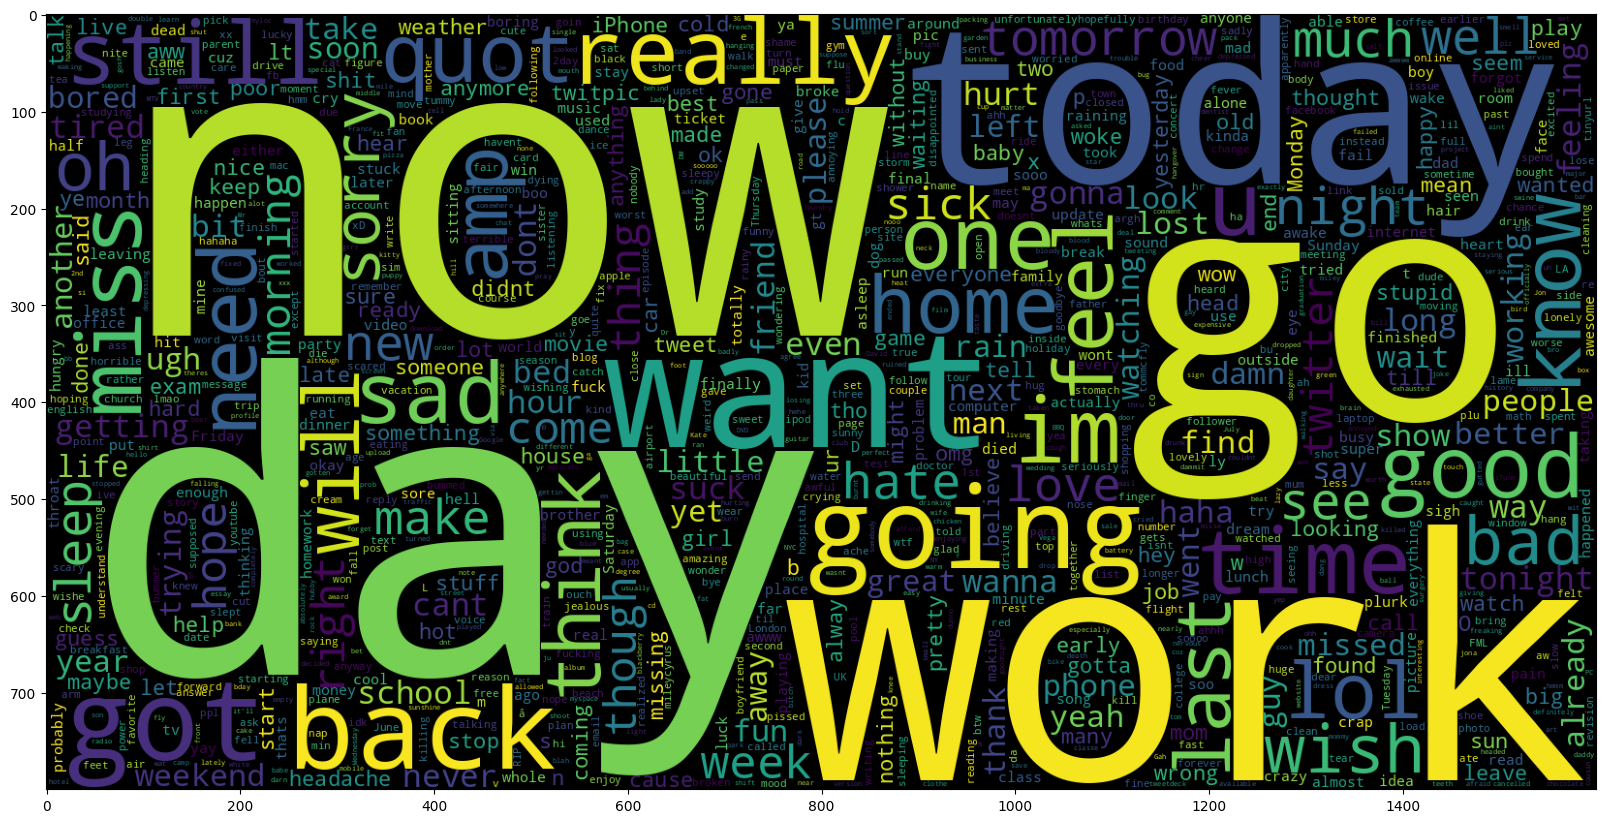

In [ ]:
# Plot a cloud of words for negative tweets :
data_neg = data['text'][:800000] # selecting the negative tweets.
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

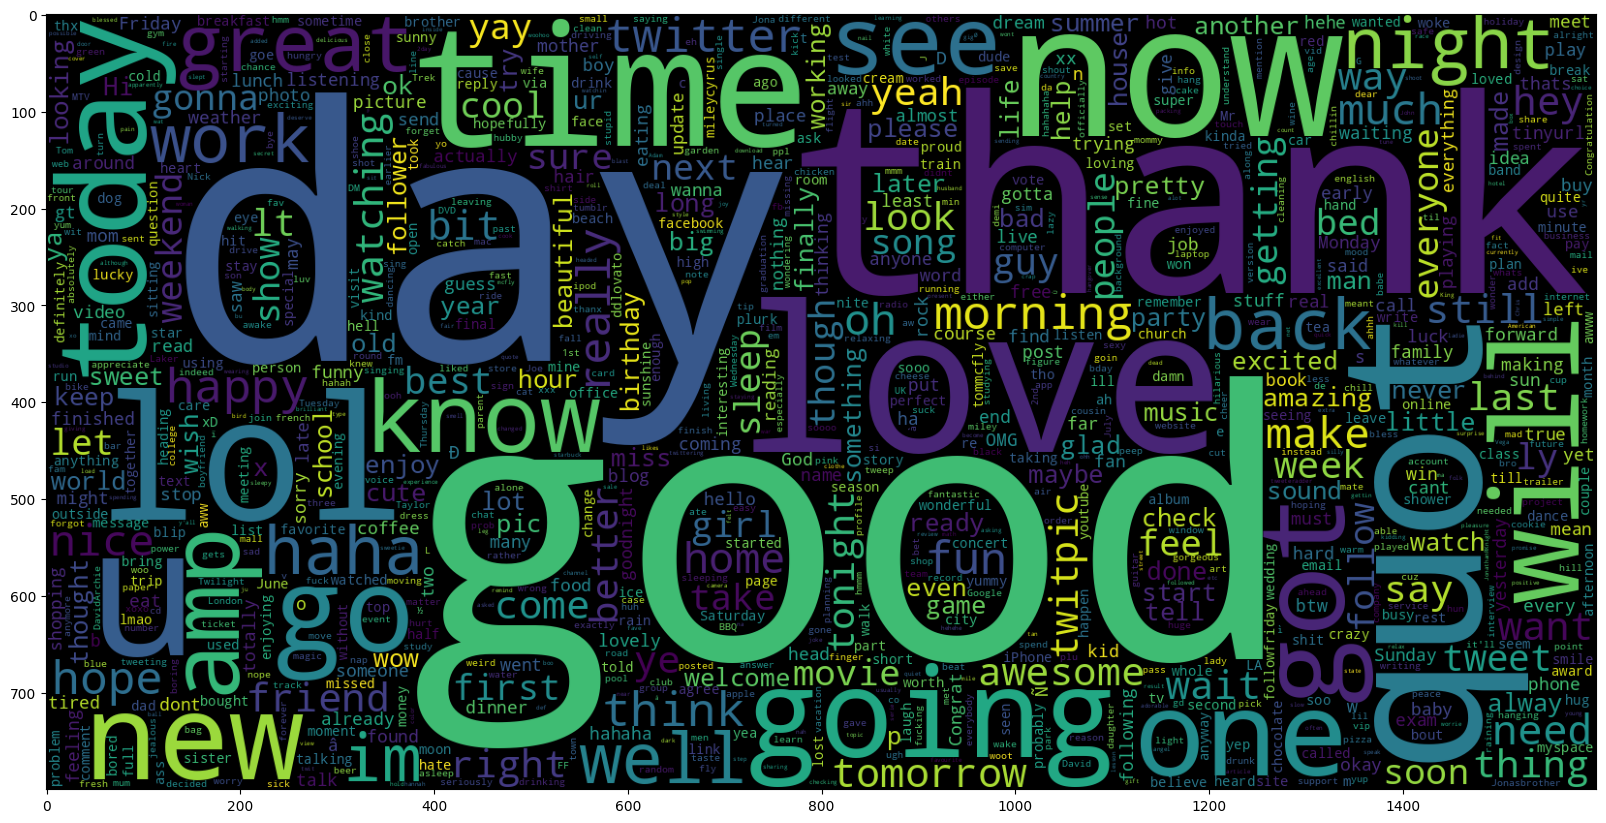

In [ ]:
# Plot a cloud of words for positive tweets :
data_pos = data['text'][800000:]  # selecting the positive tweets.
wc = WordCloud(max_words=1000, width=1600, height=800,
               collocations=False).generate(" ".join(data_pos))
plt.figure(figsize=(20, 20))
plt.imshow(wc)

### 6️⃣  `Splitting our data into Train and Test Subset ` :

In [ ]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=26105111)

- **`random_state`** is basically used for reproducing your problem the same every time it is run. If we do not use a **random_state** in **train_test_split**, every time you make the split we might get a different set of train and test data points and will not help in debugging in case we get an issue.

- **`X`** contains **`data.text`**
- **`y`** contains = **`data.target`**


- **`X_train`** contains **95%** of **`data.text`**
- **`X_test`** contains **5%** of **`data.text`**


- **`y_train`** contains **95%** of **`data.target`**
- **`y_test`** contains **5%** of **`data.target`**

###  7️⃣ `Transforming Dataset using TF-IDF Vectorizer` :
> Scikit-learn's **`Tfidftransformer`** and **`Tfidfvectorizer`** aim to do the same thing, which is to convert a collection of raw documents to a matrix of **TF-IDF features**.

In [ ]:
# Fit the TF-IDF Vectorizer :
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [ ]:
# Transform the data using TF-IDF Vectorizer :
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
X_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1563076 stored elements and shape (80000, 500000)>

###  8️⃣ `Function for Model Evaluation` :
> After training the model we then apply the evaluation measures to check how the model is performing. Accordingly, we use the following evaluation parameters to check the performance of the models respectively :
> - **`Accuracy Score`** : Typically, the accuracy of a predictive model is good (above 90% accuracy)
> - **`ROC-AUC Curve`** : The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.
> - **`Confusion Matrix with Plot`** : A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model.
    * **`Actual values`** are the columns.
    * **`Predicted values`** are the lines.
><table>
    <tbody>
        <tr>
            <td></td>
            <td><b>Positive</b></td>
            <td><b>Negative</b></td>
        </tr>
        <tr>
            <td><b>Positive</b></td>
            <td>TP</td>
            <td>TN</td>
        </tr>
        <tr>
            <td><b>Negative</b></td>
            <td>FP</td>
            <td>TN</td>
        </tr>
    </tbody>
</table>


In [ ]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

The execution time of this model is 0.88 seconds

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     40100
           1       0.80      0.81      0.80     39900

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



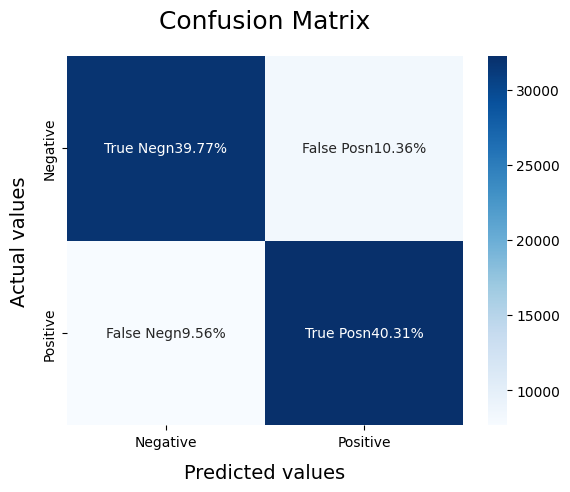

In [ ]:
# Model-1 : Bernoulli Naive Bayes.
BNBmodel = BernoulliNB()
start = time.time()
BNBmodel.fit(X_train, y_train)
end = time.time()
print("The execution time of this model is {:.2f} seconds\n".format(end-start))
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

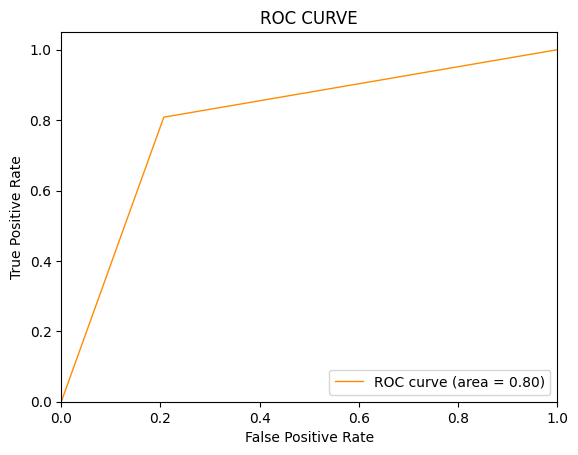

In [ ]:
# Plot the ROC-AUC Curve for model-1 :
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

The execution time of this model is 129.54 seconds

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     40100
           1       0.81      0.82      0.82     39900

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



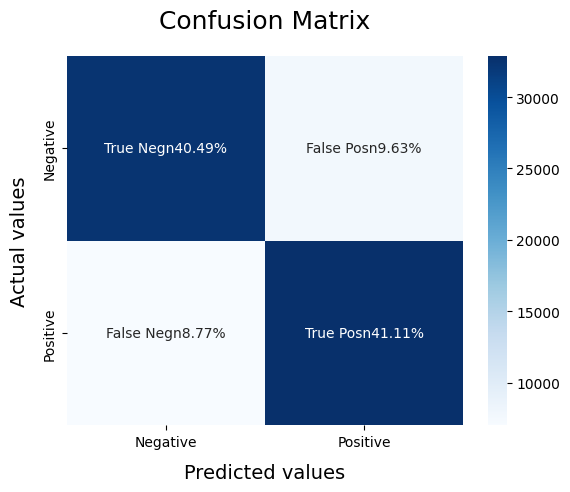

In [ ]:
# Model-2 : SVM (Support Vector Machine).
SVCmodel = LinearSVC()
start = time.time()
SVCmodel.fit(X_train, y_train)
end = time.time()
print("The execution time of this model is {:.2f} seconds\n".format(end-start))
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

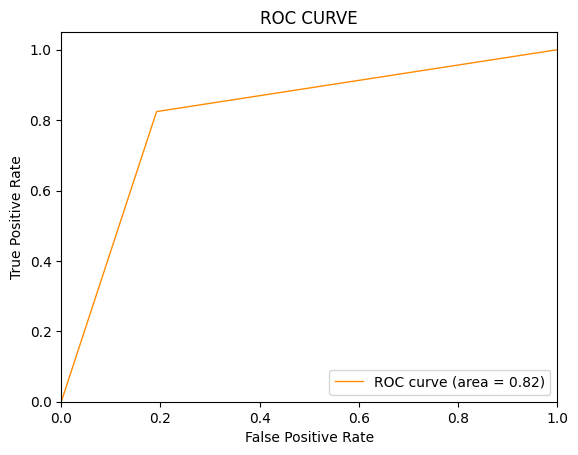

In [ ]:
# Plot the ROC-AUC Curve for model-2 :
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

The execution time of this model is 10.36 seconds

              precision    recall  f1-score   support

           0       0.83      0.81      0.82     40100
           1       0.81      0.83      0.82     39900

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



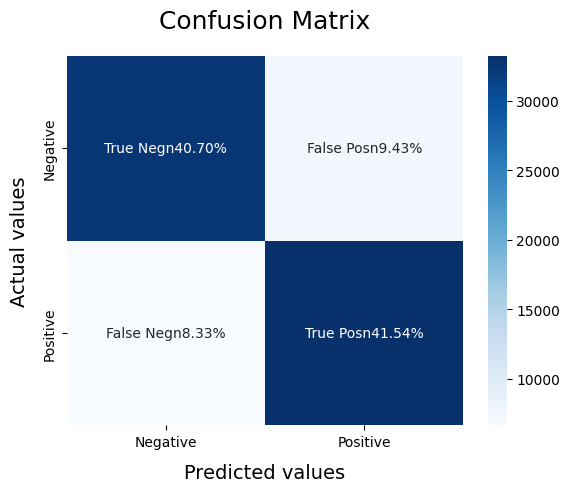

In [ ]:
# Model-3 : Logistic Regression.
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
start = time.time()
LRmodel.fit(X_train, y_train)
end = time.time()
print("The execution time of this model is {:.2f} seconds\n".format(end-start))
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

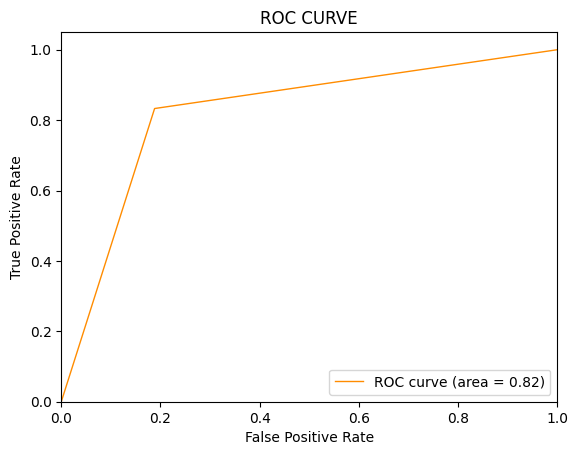

In [ ]:
# Plot the ROC-AUC Curve for model-3 :
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

<thead>
    <tr>
        <th><b>Model</b></th>
        <th><b>Accuracy</b></th>
        <th><b>F1-score ( class 0 )</b></th>
        <th><b>F1-score ( class 1 )</b></th>
        <th><b>AUC Score</b></th>
        <th><b>Execution time</b></th>
    </tr>
    </thead>
<tbody>
    <tr>
        <td><b>Bernoulli Naive Bayes (BNB)</b></td>
        <td>80%</td>
        <td>80%</td>
        <td>80%</td>
        <td>80%</td>
        <td>0.69 seconds</td>
    </tr>
    <tr>
        <td><b>Support Vector Machine (SVM)</b></td>
        <td>82%</td>
        <td>81%</td>
        <td>82%</td>
        <td>82%</td>
        <td>28.32 seconds</td>
    </tr>
    <tr>
        <td><b>Logistic Regression (LR)</b></td>
        <td>83%</td>
        <td>83%</td>
        <td>83%</td>
        <td>83%</td>
        <td>163.56 seconds</td>
    </tr>
</tbody>